# COMP 579 Assignment 1

1. Do Not Change the Random Seed
The random seed has been set to ensure reproducibility. Please do not modify it.

2. Guidance for the First Question
For the initial question, fill in the blanks under the sections marked as TODO. Follow the provided structure and complete the missing parts.

3. Approach for Subsequent Questions
For the later questions, we expect you to attempt the solutions independently. You can refer to the examples provided in earlier questions to understand how to 
plot figures and implement solutions.

4. Ensure that the plots you produce for later questions are similar in style and format to those shown in the previous examples.

In [20]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(40)

plt.rcParams["figure.figsize"]=10,5

## Q1 Simulator for Bernoulli Bandit

In [21]:

class GaussianBandit:
  """
    A class representing a Gaussian multi-armed bandit.

    Attributes
    ----------
    num_arms : int
        Number of arms in the bandit.
    mean : list or np.ndarray
        List of mean rewards for each arm.
    variance : float
        Variance of the rewards for all arms.

    Methods
    -------
    sample(arm_index)
        Samples a reward from the specified arm based on a Gaussian distribution.
    """

  # TODO:
  def __init__(self, num_arms, mean, variance):
    self.num_arms = num_arms
    self.mean = np.array(mean)
    self.variance = variance

  def sample(self, arm_index):
    if arm_index < 0 or arm_index >= self.num_arms:
      raise IndexError("Invalid arm index. Must be between 0 and num_arms - 1.")
    return np.random.normal(self.mean[arm_index], np.sqrt(self.variance))
 

In [22]:
# TODO:
delta = 0.2
num_arms = 3
means = [0.5,0.5-delta,0.5+delta]
means_2 = [0.5,0.5+2*delta,0.5-2*delta]
variance = 0.01
num_samples = 50

three_arm_gaussian_bandit = GaussianBandit(num_arms, means, variance)
three_arm_gaussian_bandit_2 = GaussianBandit(num_arms, means_2, variance)

# Store the rewards for each arm
action_rewards = []
actions = range(num_arms)

for action in actions:
    # Store 50 samples per action
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    action_rewards.append(rewards)


### Graphs

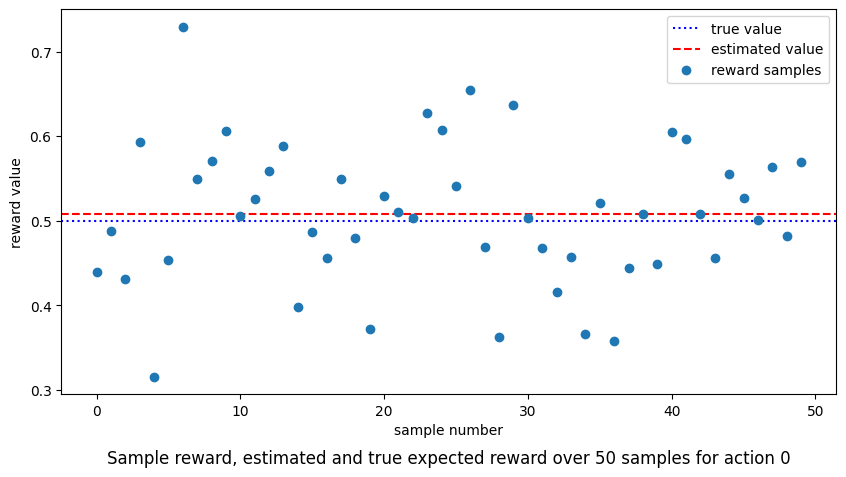

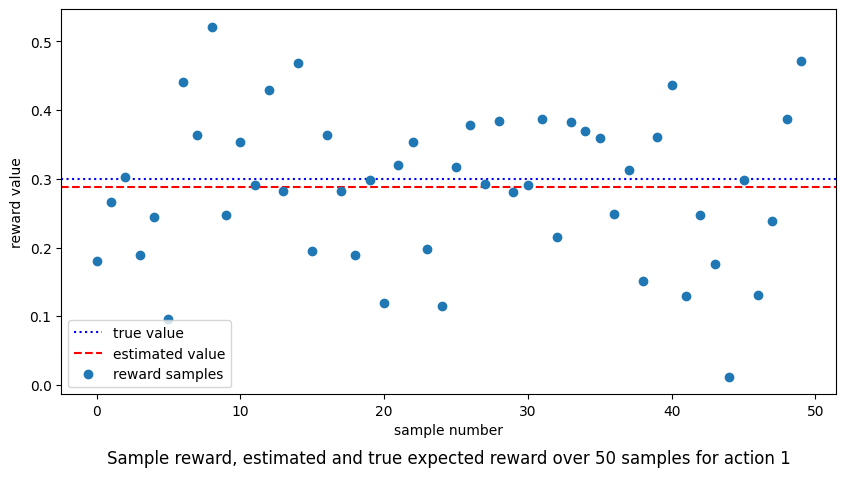

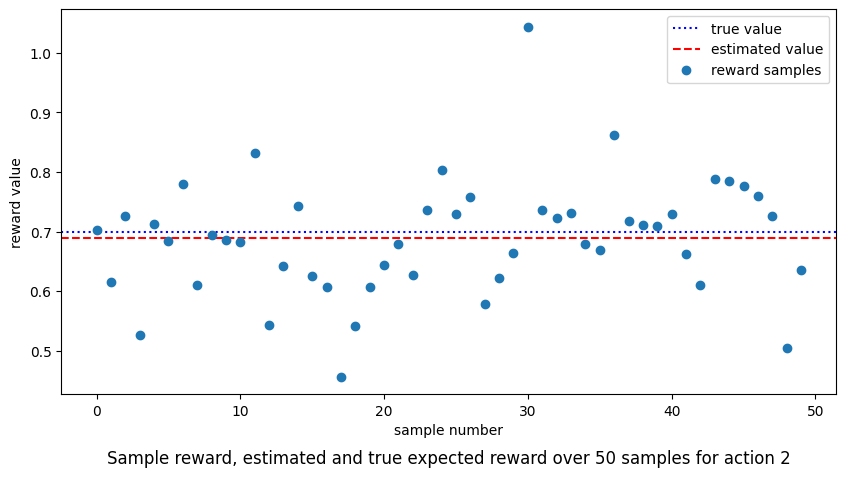

In [23]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  true_value = three_arm_gaussian_bandit.mean[action]
  estimated_value = np.mean(action_rewards[action])

  # draw the line of the true value
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")
  # draw the line of the estimated value
  line_est_val = ax.axhline(y = estimated_value, color = 'r', linestyle = '--', label = "estimated value")
  # plot the reward samples
  plt_samples, = ax.plot(action_rewards[action], 'o', label = "reward samples")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Sample reward, estimated and true expected reward over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, line_est_val, plt_samples])

## Q2 Estimated Q values

In [24]:
def update(reward_samples, alpha):
  """
  Each call to the function yields the current incremental average of the reward with a fixed learning rate, alpha
  E.g. Inital call returns alpha * reward_samples[0], second call returns prev_val + alpha * (reward_samples[1] - prev_val)
  where prev_val is the value return from the previous call, so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  alpha : int
      learning rate parameter for the averaging
  """
  prev_val = 0
  for sample in reward_samples:
    new_val = prev_val + alpha * (sample - prev_val)
    prev_val = new_val
    yield new_val

def updateAvg(reward_samples):
  """
  Each call to the function yields the current incremental average of the reward
  E.g. Inital call returns reward_samples[0], second call returns the average of reward_samples[0] and reward_samples[0], so on and so forth

  Parameters
  ----------
  reward_samples : array of int
      samples of reward values from one arm of a bandit
  """
  prev_val = reward_samples[0]
  n = 1
  # first iteration only updates n to 2, no update to average
  for sample in reward_samples:
    new_val = prev_val + (sample - prev_val) / n
    prev_val = new_val
    n += 1
    yield new_val
    
def updateDecaying(reward_samples, alpha_0=0.5, lambda_=0.01, p=0.5):
    """
    Each call to the function yields the updated estimate of the action value using an
    improved decaying learning rate.

    Parameters
    ----------
    reward_samples : array-like of int or float
        Samples of reward values from one arm of a bandit.
    alpha_0 : float, optional
        The initial learning rate (default is 0.5).
    lambda_ : float, optional
        The decay rate constant (default is 0.01).
    p : float, optional
        The power parameter for controlling decay (default is 0.5).
    """
    prev_val = 0
    for i, sample in enumerate(reward_samples, start=1):
      alpha = alpha_0 / (1 + lambda_ * i**p)
      new_val = prev_val + alpha * (sample - prev_val)
      prev_val = new_val
      yield new_val

### Graphs

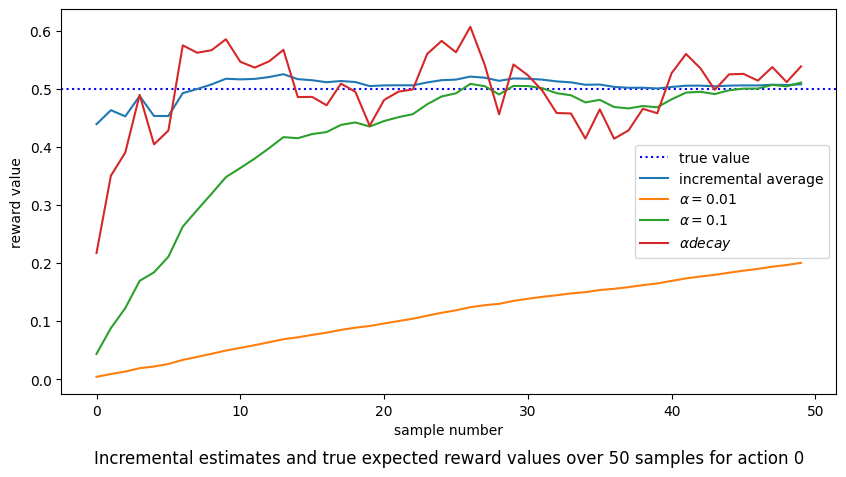

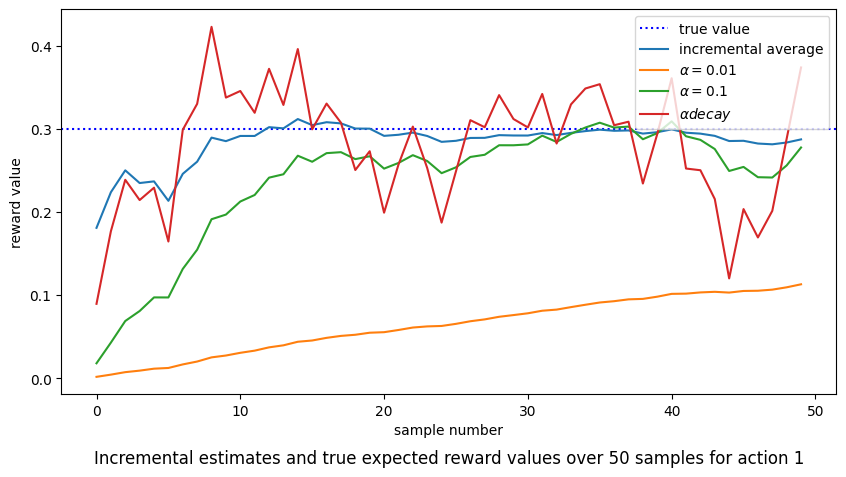

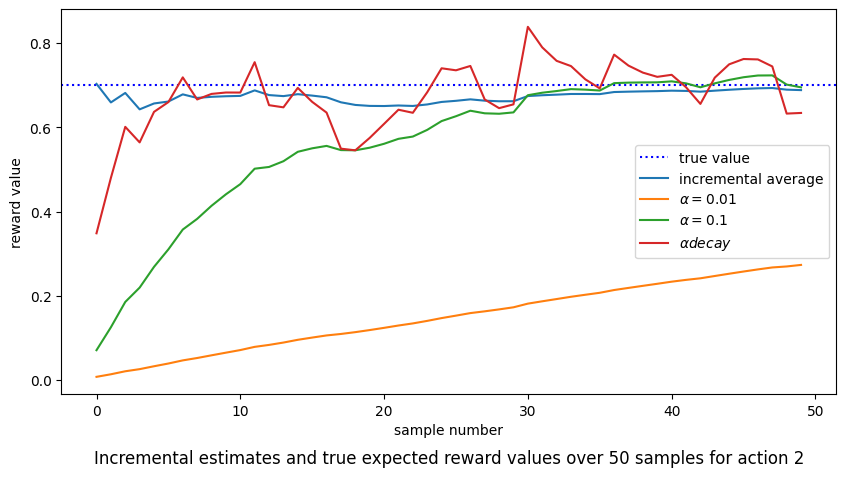

In [25]:
for action in actions:
  fig, ax = plt.subplots()

  # TODO:
  incr_avgs = list(updateAvg(reward_samples=action_rewards[action]))
  alpha_1_percent = list(update(action_rewards[action], 0.01))
  alpha_10_percent = list(update(action_rewards[action], 0.1))
  alpha_decay = list(updateDecaying(action_rewards[action], alpha_0=0.5, lambda_=0.01, p=0.5))
  true_value = means[action]

  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # plot incremental values for averaging, alpha = 0.01, alpha = 0.1
  plt_incr_avgs, = ax.plot(incr_avgs, label = "incremental average")
  plt_alpha_1_percent, = ax.plot(alpha_1_percent, label = r"$\alpha = 0.01$")
  plt_alpha_10_percent, = ax.plot(alpha_10_percent, label = r"$\alpha = 0.1$")
  plt_alpha_decay, = ax.plot(alpha_decay, label = r"$\alpha decay$")

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values over 50 samples for action %s" %action, y=-0.2)

  # show the legend with the labels of the line
  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

## Q3 Effect of $α$ on Estimated Q values

In [26]:
# TODO:
num_samples = 100

# arrays of the data generated from 100 runs
incr_avgs_runs = []
alpha_1_percent_runs = []
alpha_10_percent_runs = []
alpha_decay_runs = []


# TODO:
for run in range(100):
  # arrays of data generated from the 3 actions in 1 run
  sample_incr_avgs_by_actions = []
  sample_alpha_1_percent_by_actions = []
  sample_alpha_10_percent_by_actions = []
  sample_alpha_decay_by_actions = []

  for action in actions:
    rewards = [three_arm_gaussian_bandit.sample(action) for _ in range(num_samples)]
    sample_incr_avgs_by_actions.append(list(updateAvg(rewards)))
    sample_alpha_1_percent_by_actions.append(list(update(rewards, 0.01)))
    sample_alpha_10_percent_by_actions.append(list(update(rewards, 0.1)))
    sample_alpha_decay_by_actions.append(list(updateDecaying(rewards)))

  incr_avgs_runs.append(sample_incr_avgs_by_actions)
  alpha_1_percent_runs.append(sample_alpha_1_percent_by_actions)
  alpha_10_percent_runs.append(sample_alpha_10_percent_by_actions)
  alpha_decay_runs.append(sample_alpha_decay_by_actions)

# convert to np arrays
incr_avgs_runs = np.asarray(incr_avgs_runs)
alpha_1_percent_runs = np.asarray(alpha_1_percent_runs)
alpha_10_percent_runs = np.asarray(alpha_10_percent_runs)
alpha_decay_runs = np.asarray(alpha_decay_runs)

### Graphs

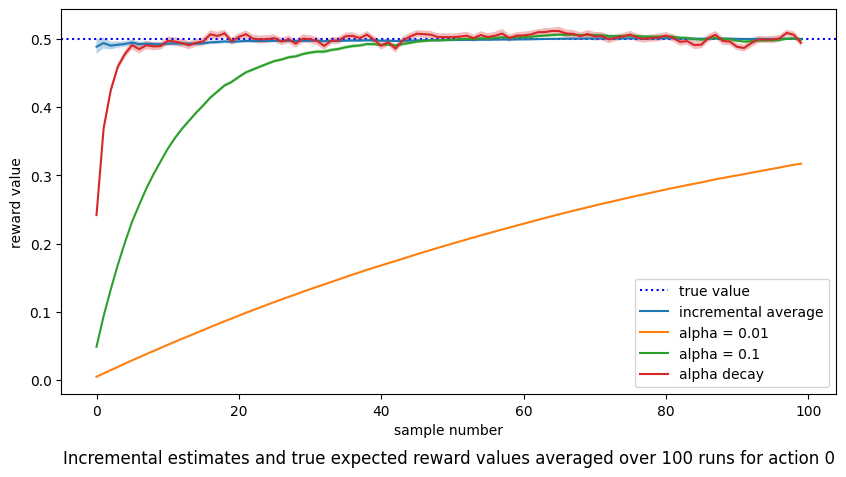

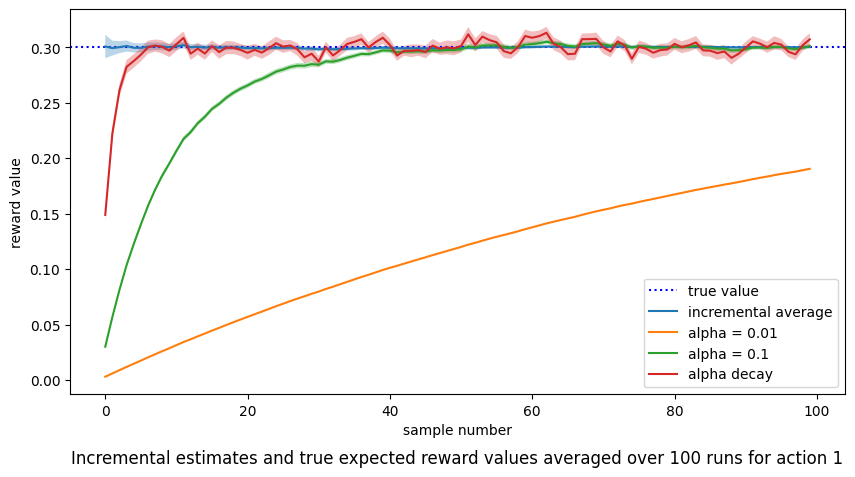

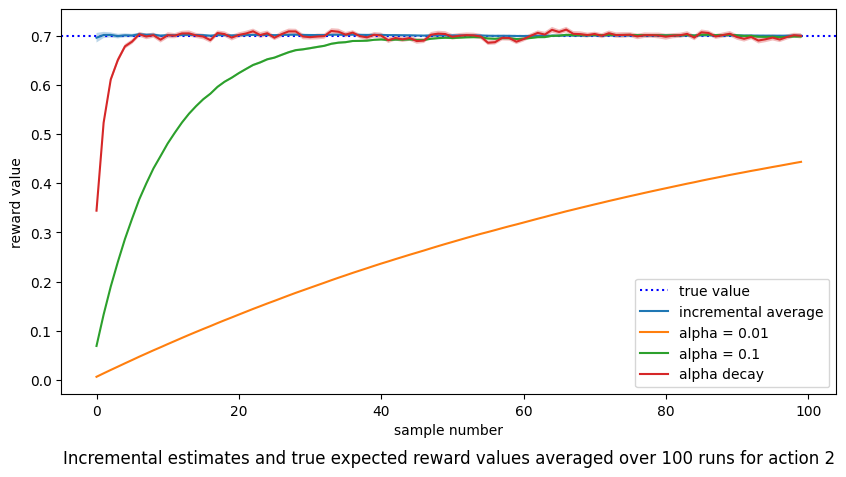

In [27]:
for action in actions:
  fig, ax = plt.subplots()

  # obtain averaged incremental reward values for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  # TODO:
  mean_incr_avgs_by_actions = np.mean(incr_avgs_runs[:,action,:], axis=0)
  mean_alpha_1_percent_by_actions = np.mean(alpha_1_percent_runs[:,action,:], axis=0)
  mean_alpha_10_percent_by_actions =np.mean(alpha_10_percent_runs[:,action,:], axis=0)
  mean_alpha_decay_by_actions = np.mean(alpha_decay_runs[:,action,:], axis=0)

  true_value = means[action]

  # obtain the standard deviation for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0)
  std_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0)
  std_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0)
  std_alpha_decay_by_actions = np.std(alpha_decay_runs[:,action,:], axis=0)

  # obtain the standard error for averaging, alpha = 0.01, alpha = 0.1 and decay alpha over 100 runs
  std_err_incr_avgs_by_actions = np.std(incr_avgs_runs[:,action,:], axis=0) / np.sqrt(np.size(incr_avgs_runs[:,action,:], axis=0))
  std_err_alpha_1_percent_by_actions = np.std(alpha_1_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_1_percent_runs[:,action,:], axis=0))
  std_err_alpha_10_percent_by_actions = np.std(alpha_10_percent_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_10_percent_runs[:,action,:], axis=0))
  std_err_alpha_decay_by_actions = np.std(alpha_decay_runs[:,action,:], axis=0) / np.sqrt(np.size(alpha_decay_runs[:,action,:], axis=0))
  
  # draw the true value line
  line_true_val = ax.axhline(y = true_value, color = 'b', linestyle = ':', label = "true value")

  # draw the averaged incremental reward values for averaging
  plt_incr_avgs, = ax.plot(mean_incr_avgs_by_actions, label = "incremental average")
  # draw the error bar/area for averaging
  incr_avgs_minus_std_err = mean_incr_avgs_by_actions - std_err_incr_avgs_by_actions
  incr_avgs_plus_std_err = mean_incr_avgs_by_actions + std_err_incr_avgs_by_actions
  ax.fill_between(range(0,100), incr_avgs_minus_std_err, incr_avgs_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.01
  plt_alpha_1_percent, = ax.plot(mean_alpha_1_percent_by_actions, label = "alpha = 0.01")
  # draw the error bar/area for alpha = 0.01
  alpha_1_percent_minus_std_err = mean_alpha_1_percent_by_actions - std_err_alpha_1_percent_by_actions
  alpha_1_percent_plus_std_err = mean_alpha_1_percent_by_actions + std_err_alpha_1_percent_by_actions
  ax.fill_between(range(0,100), alpha_1_percent_minus_std_err, alpha_1_percent_plus_std_err, alpha=0.3)

  # draw the averaged incremental reward values for alpha = 0.1
  plt_alpha_10_percent, = ax.plot(mean_alpha_10_percent_by_actions, label = "alpha = 0.1")
  # draw the error bar/area for alpha = 0.1
  alpha_10_percent_minus_std_err = mean_alpha_10_percent_by_actions - std_err_alpha_10_percent_by_actions
  alpha_10_percent_plus_std_err = mean_alpha_10_percent_by_actions + std_err_alpha_10_percent_by_actions
  ax.fill_between(range(0,100), alpha_10_percent_minus_std_err, alpha_10_percent_plus_std_err, alpha=0.3)
  
  plt_alpha_decay, = ax.plot(mean_alpha_decay_by_actions, label = "alpha decay")
  alpha_decay_minus_std_err = mean_alpha_decay_by_actions - std_err_alpha_decay_by_actions
  alpha_decay_plus_std_err = mean_alpha_decay_by_actions + std_err_alpha_decay_by_actions
  ax.fill_between(range(0,100), alpha_decay_minus_std_err, alpha_decay_plus_std_err, alpha=0.3)

  ax.set_xlabel("sample number")
  ax.set_ylabel("reward value")
  ax.set_title("Incremental estimates and true expected reward values averaged over 100 runs for action %s" %action, y=-0.2)

  ax.legend(handles=[line_true_val, plt_incr_avgs, plt_alpha_1_percent, plt_alpha_10_percent, plt_alpha_decay])

### Answers
Alpha = 0.1 outperforms 0.01. Incremental averaging provides the closet approximation in all three actions. It's beneficial to incorporate decaying learning rate when num_sample is 0-50.  But after 50 sample, alpha=0.1 presents closer approximation. I will experiment with alpha = [0.05, 0.15] for further optimization.

## Q4 Epsilon-greedy

In [28]:
def epsilon_greedy(bandit, epsilon, bandit_2 = None, alpha = None, num_time_step = 1000, epsilon_decay=False, lambda_=0.001):
  """Epsilon greedy algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample
  epsilon: float
      A parameter which determines the probability for a random action to be selected
  alpha: (optional) float
      A parameter which determined the learning rate for averaging. If alpha is none, incremental averaging is used.
      Default is none, corresponding to incremental averaging.

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """
  # TODO:
  num_arms = bandit.num_arms
  curr_bandit = bandit
  Q_arr = np.zeros(num_arms) # array of estimated average reward for each action
  N_arr = np.zeros(num_arms) # array of number of times picked for each action
  total_R = 0
  total_l = 0
  actions = range(num_arms)

  opt_value = max(curr_bandit.mean)               # highest expected reward among all actions
  best_action =  np.argmax(curr_bandit.mean)# the index of the action with highest expected reward

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []
  
  epsilon_t = epsilon 

  for time_step in range(num_time_step):
    if bandit_2 != None and time_step == 499:
        curr_bandit = bandit_2
        opt_value = max(curr_bandit.mean)               # highest expected reward among all actions
        best_action =  np.argmax(curr_bandit.mean)# the index of the action with highest expected reward

    if epsilon_decay:
        epsilon_t = epsilon * np.exp(-lambda_ * time_step)
            
    A_star = np.random.choice([a for a in actions if Q_arr[a] == np.max(Q_arr)])     # get action with highest estimated average reward with random tie-breaking
    A_random = np.random.choice(actions)
    A = np.random.choice([A_star, A_random], p=[1 - epsilon_t, epsilon_t]) # pick a random action with probability epsilon
    curr_R = curr_bandit.sample(A)
    N_arr[A] = N_arr[A] + 1

    if alpha == None:
      # incremental averaging
      Q_arr[A] += (curr_R - Q_arr[A]) / N_arr[A]
    else:
      Q_arr[A] += alpha * (curr_R - Q_arr[A])

    R_over_t.append(curr_R)

    total_R = total_R + curr_R
    total_R_over_t.append(total_R)

    est_is_best = 1 if A == best_action else 0
    est_is_best_over_t.append(est_is_best)

    l_t = opt_value - curr_R
    l_over_t.append(l_t)

    total_l = total_l + l_t
    total_l_over_t.append(total_l)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

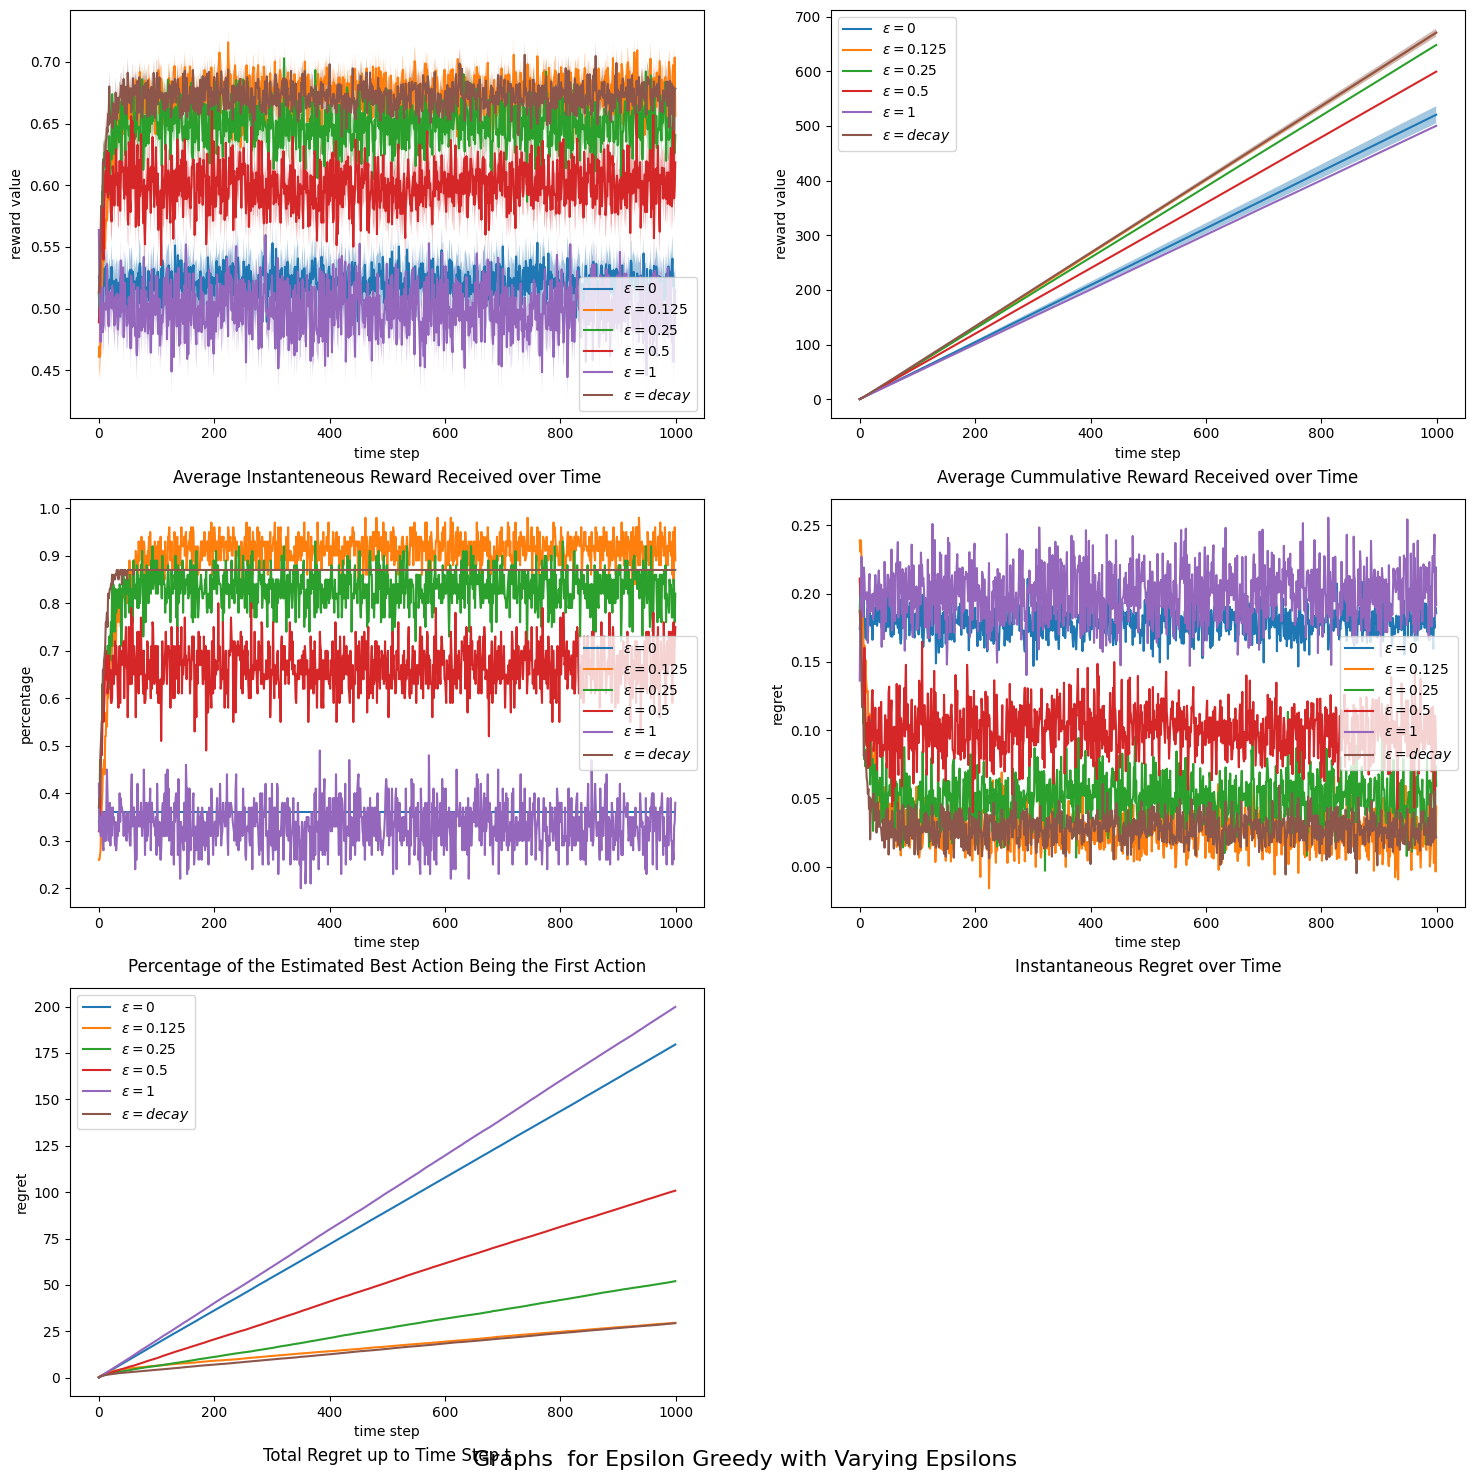

In [29]:
#TODO:
epsilons = [0, 1/8, 1/4, 1/2, 1]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for epsilon in epsilons + ["decay"]:

  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if epsilon == "decay":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          bandit=three_arm_gaussian_bandit,
          epsilon=decaying_epsilon_params['epsilon_0'],
          epsilon_decay=True, 
          lambda_=decaying_epsilon_params['lambda_']
      )
    else:
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          bandit=three_arm_gaussian_bandit,
          epsilon=epsilon
      )
    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = r"$\epsilon = %s$" %epsilon)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18)

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = r"$\epsilon = %s$" %epsilon)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs  for Epsilon Greedy with Varying Epsilons'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers
The overall performance of each epsilon ranks like: 1/8, decay, 1/4, 1/2, 0, 1. Smaller epsilon values generally lead to higher cumulative rewards, a greater percentage of choosing the optimal action as the best action, and lower regret. Additionally, decaying epsilon outperforms static epsilon values, except when epsilon is as small as 1/8.

## Q5 Hyperparameters for Epsilon-greedy

To have a plain start, you have been provided with predefined functions for generating plots until now. However, moving forward, you are expected to plot graphs on your own.

### Graphs

C:\Users\CalayahXiong\AppData\Local\Temp\ipykernel_14636\1793764125.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


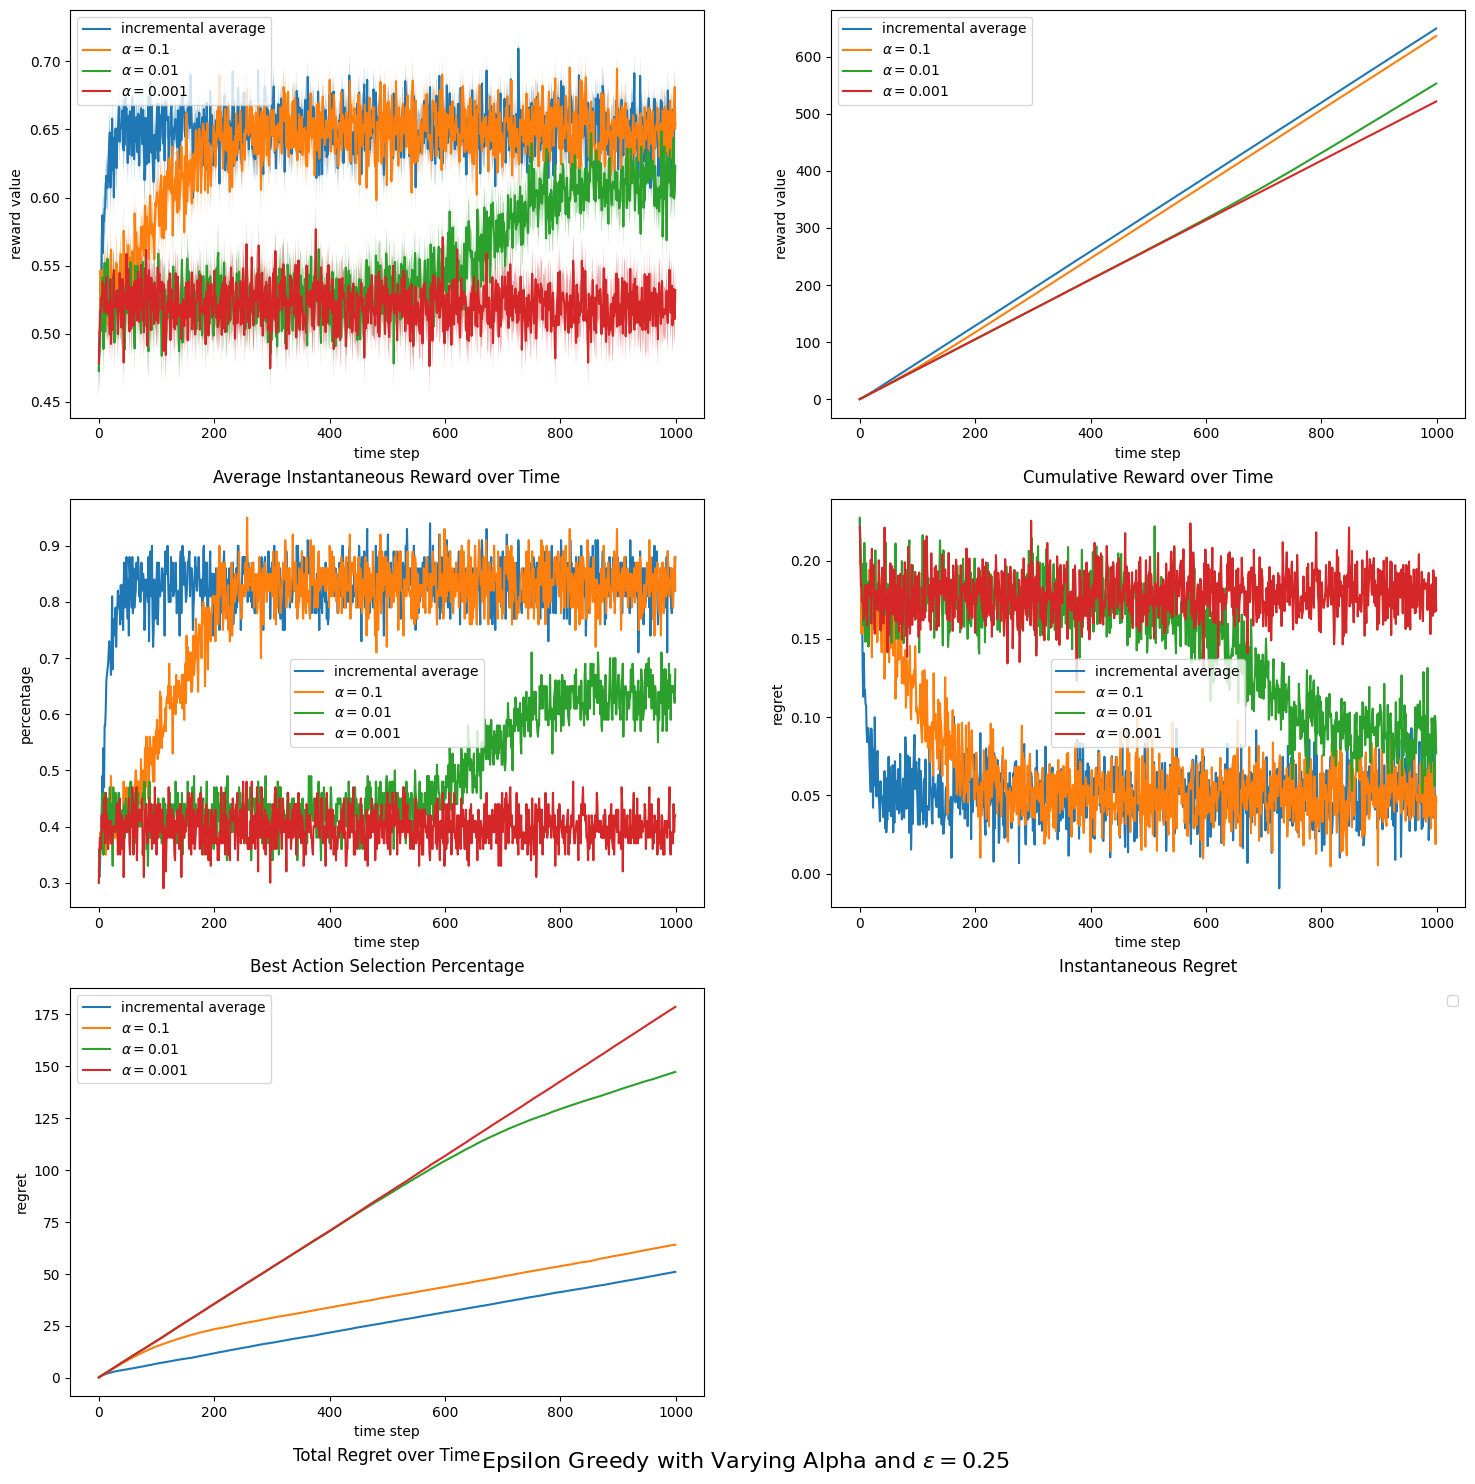

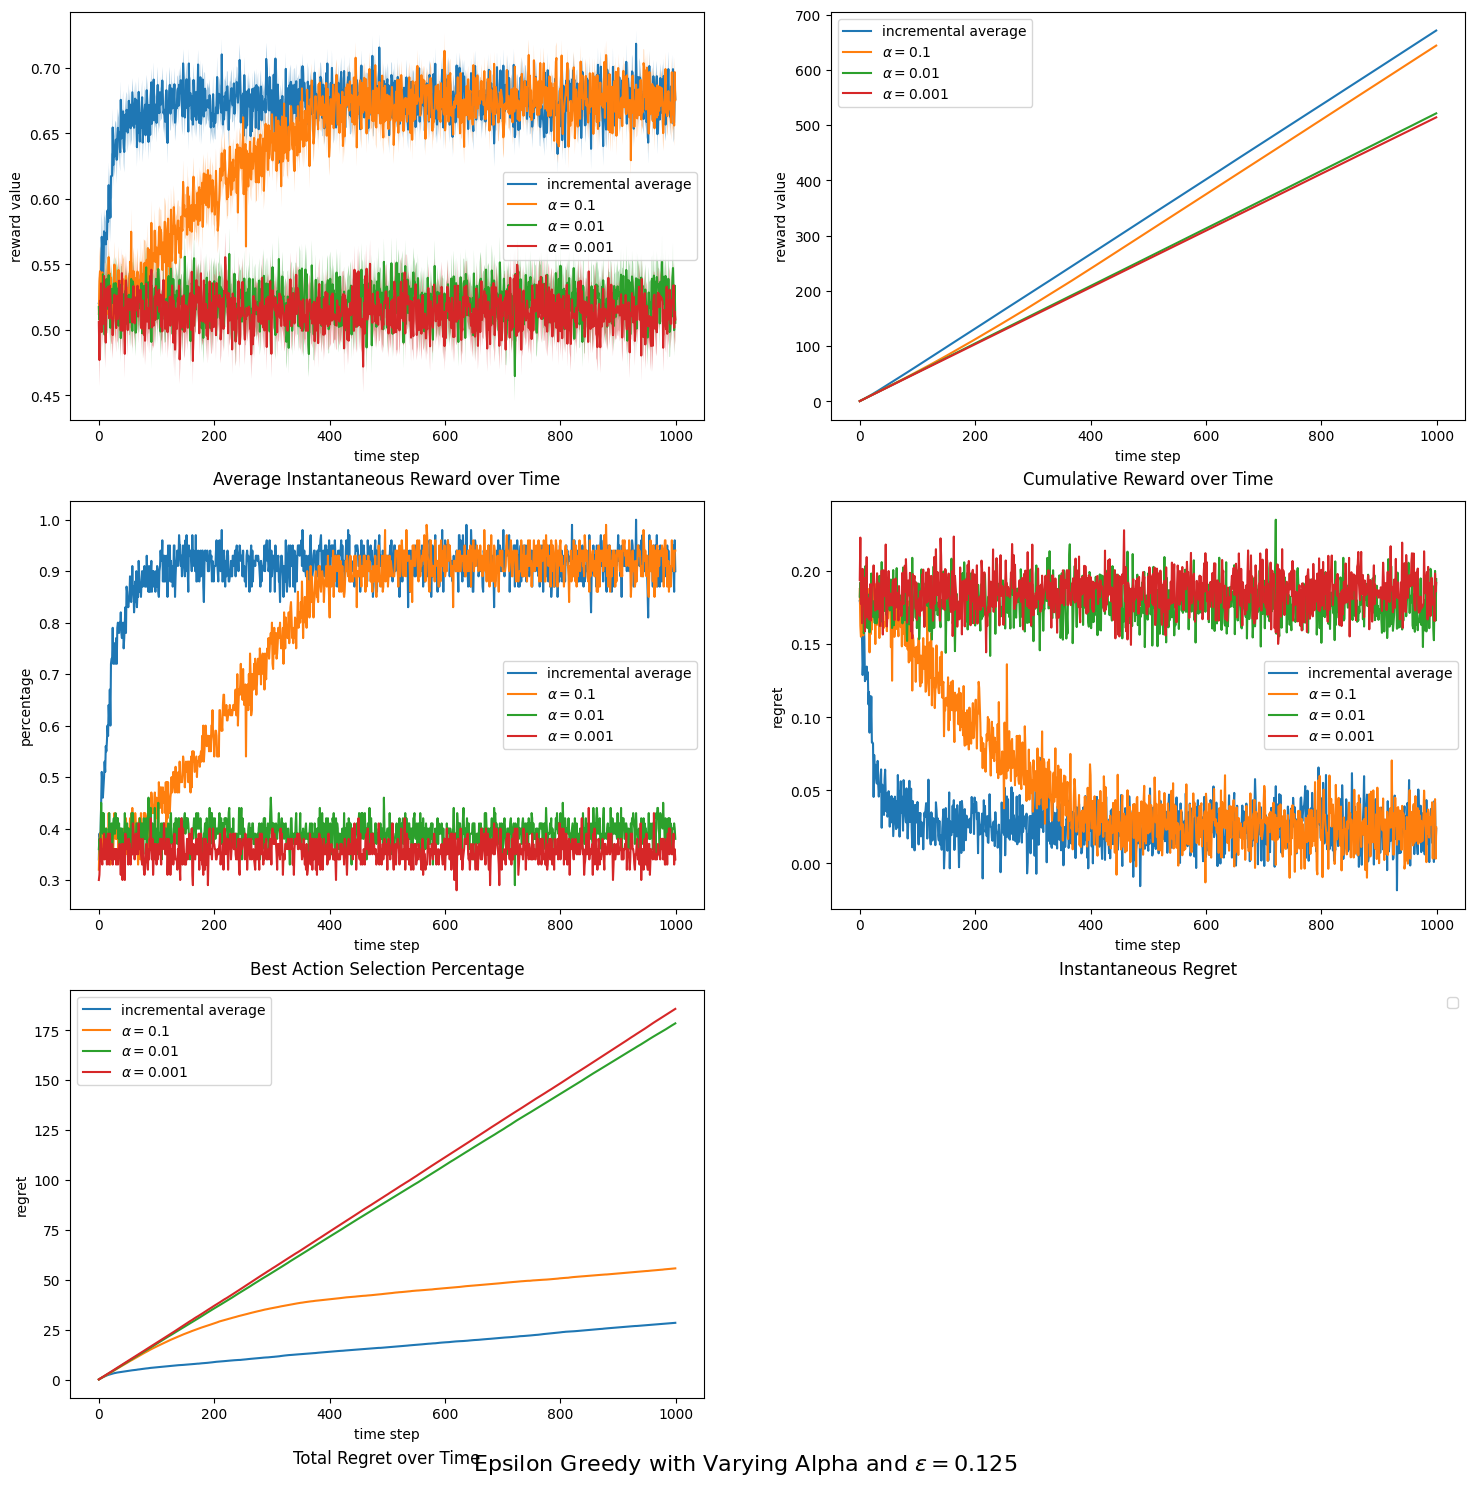

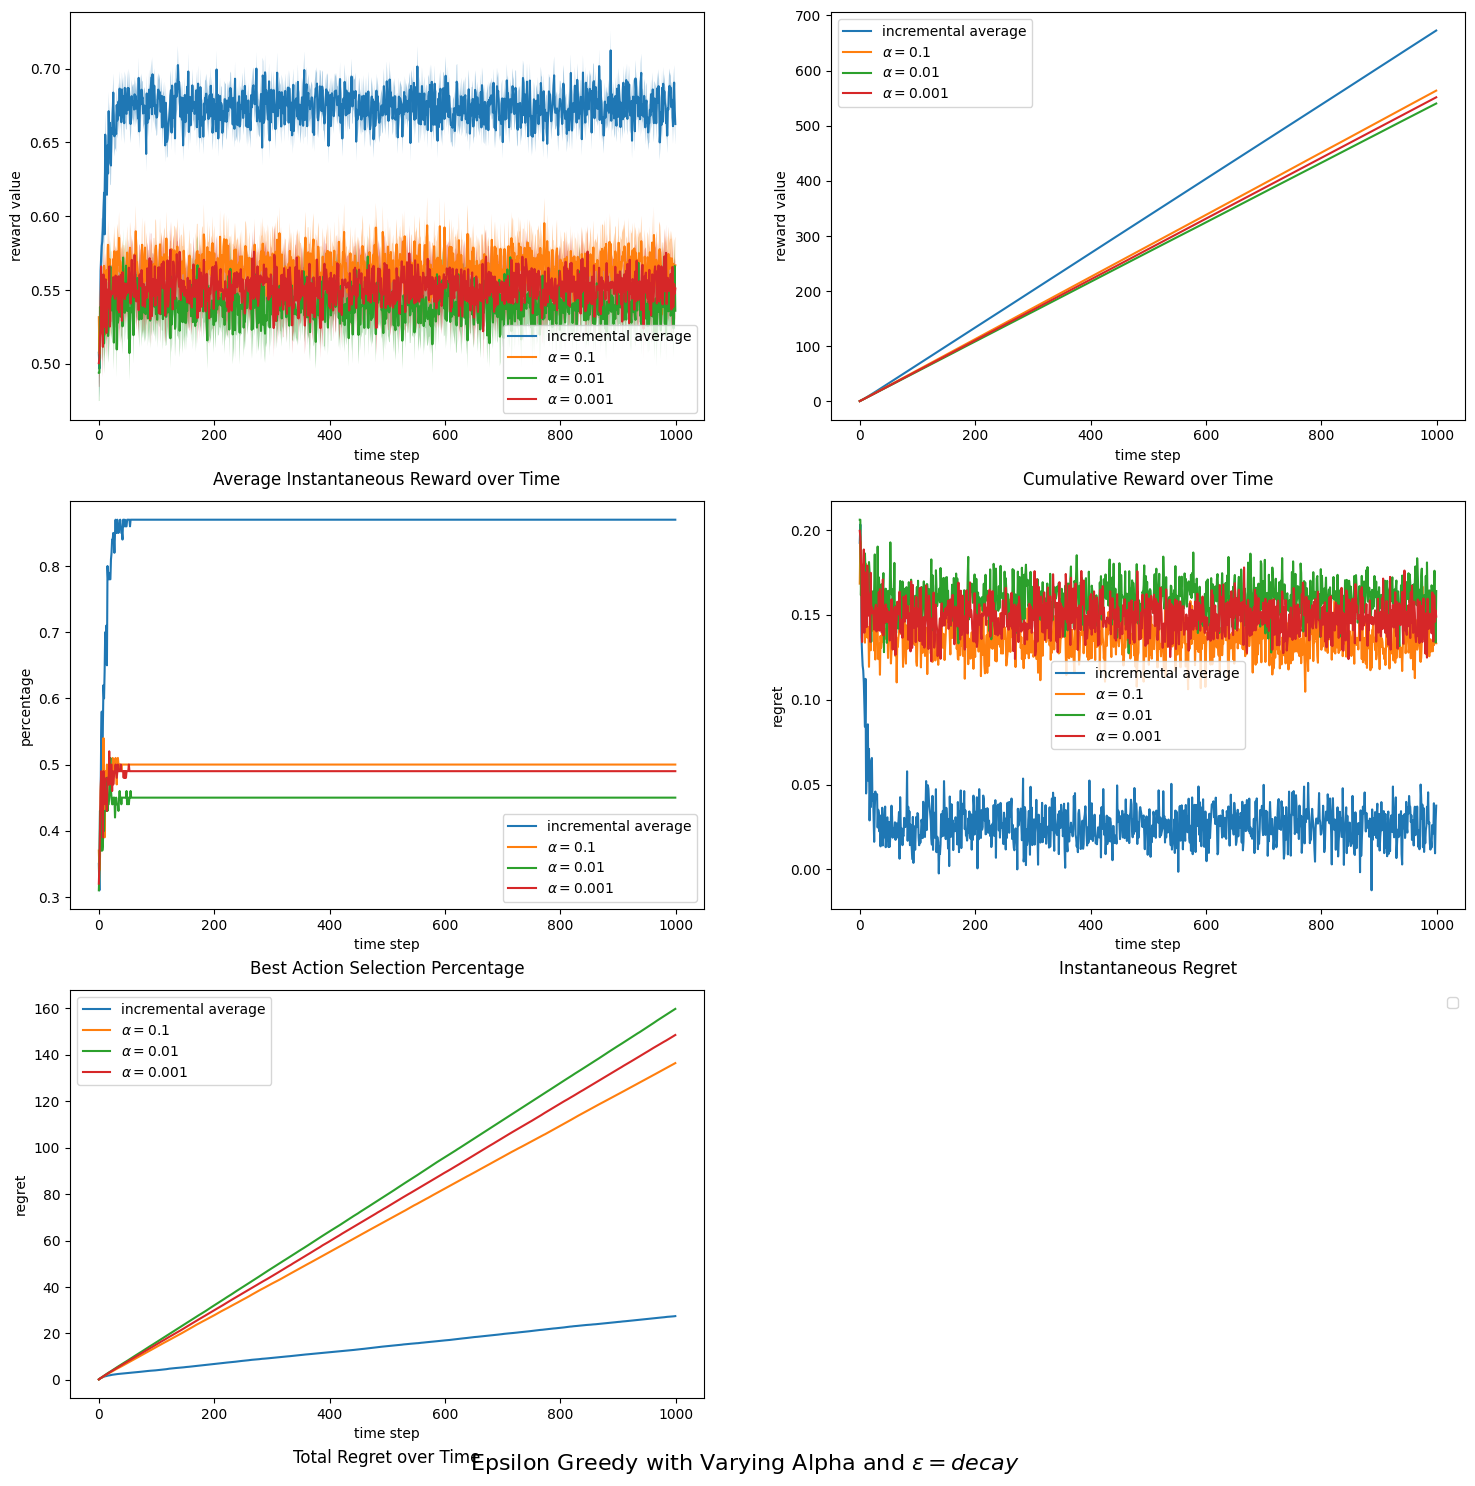

In [30]:
epsilons = [1/4, 1/8]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters
alphas = [None, 0.1, 0.01, 0.001]

for epsilon in epsilons + ["decay"]:
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18,18))

    for alpha in alphas:
        R_over_t_runs, total_R_over_t_runs = [], []
        est_is_best_over_t_runs, l_over_t_runs, total_l_over_t_runs = [], [], []

        for run in range(100):
            if epsilon == "decay":
                R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                    bandit=three_arm_gaussian_bandit,
                    alpha=alpha,
                    epsilon=decaying_epsilon_params['epsilon_0'],
                    epsilon_decay=True,
                    lambda_=decaying_epsilon_params['lambda_']
                )
            else:
                R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                    bandit=three_arm_gaussian_bandit,
                    epsilon=epsilon,
                    alpha=alpha
                )
            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)
            est_is_best_over_t_runs.append(est_is_best_over_t)
            l_over_t_runs.append(l_over_t)
            total_l_over_t_runs.append(total_l_over_t)

        mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
        std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(len(R_over_t_runs))
        
        alpha_label = "incremental average" if alpha is None else r"$\alpha = %s$" % alpha

        axs[0,0].plot(mean_R_over_t_runs, label=alpha_label)
        axs[0,0].fill_between(range(0, 1000), mean_R_over_t_runs - std_err_R_over_t_runs,
                              mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)
        axs[0,0].set_xlabel("time step")
        axs[0,0].set_ylabel("reward value")
        axs[0,0].set_title("Average Instantaneous Reward over Time", y=-0.18)
        
        mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
        axs[0,1].plot(mean_total_R_over_t_runs, label=alpha_label)
        axs[0,1].fill_between(range(0, 1000), mean_total_R_over_t_runs - std_err_R_over_t_runs,
                              mean_total_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)
        axs[0,1].set_xlabel("time step")
        axs[0,1].set_ylabel("reward value")
        axs[0,1].set_title("Cumulative Reward over Time", y=-0.18)
        
        est_is_best_avgs = np.mean(est_is_best_over_t_runs, axis=0)
        axs[1,0].plot(est_is_best_avgs, label=alpha_label)
        axs[1,0].set_xlabel("time step")
        axs[1,0].set_ylabel("percentage")
        axs[1,0].set_title("Best Action Selection Percentage", y=-0.18)
        
        l_over_t_avgs = np.mean(l_over_t_runs, axis=0)
        axs[1,1].plot(l_over_t_avgs, label=alpha_label)
        axs[1,1].set_xlabel("time step")
        axs[1,1].set_ylabel("regret")
        axs[1,1].set_title("Instantaneous Regret", y=-0.18)
        
        total_l_over_t_avgs = np.mean(total_l_over_t_runs, axis=0)
        axs[2,0].plot(total_l_over_t_avgs, label=alpha_label)
        axs[2,0].set_xlabel("time step")
        axs[2,0].set_ylabel("regret")
        axs[2,0].set_title("Total Regret over Time", y=-0.18)
        
    axs[-1, -1].axis('off')
    fig.suptitle(r'Epsilon Greedy with Varying Alpha and $\epsilon = %s$' % epsilon, fontsize=16, y=0.08)
    for ax in axs.flat:
        ax.legend()
    plt.show()


### Answers

For ε = 1/4, the incremental average outperforms other α values during the early stages, with α = 0.1 achieving nearly identical performance after time step 200. A similar pattern is observed for ε = 1/8, where α = 0.01 performs better than α = 0.001. Interestingly, for ε = 1/8, α = 0.01 and α = 0.001 yield comparable results.

For decaying ε, the incremental average consistently ranks highest, shows a great gap with other settings, followed by α = 0.1, α = 0.001, and α = 0.01. Notably, the percentage of selecting the best action as the first action becomes super stable, without any wave across all α values over time.

## Q6 Gradient Bandit

In [31]:
import numpy as np

def gradient_bandit(bandit, alpha, bandit_2=None, num_time_steps=1000, decaying_rate=False, lambda_=0.01, p=0.5):
    """Gradient Bandit algorithm with dynamic environment change."""
    curr_bandit = bandit
    num_arms = curr_bandit.num_arms
    preferences = np.zeros(num_arms)  # Preferences for each action
    action_probs = np.ones(num_arms) / num_arms  # Start with uniform probabilities
    baseline = 0  # Baseline for reward normalization

    rewards_over_time = []  # Instantaneous rewards
    total_rewards_over_time = []  # Cumulative rewards
    action_best_over_time = []  # 1 if selected action was the best, 0 otherwise
    total_regret_over_time = []  # Instantaneous regret
    total_regret_cumulative = []  # Cumulative regret
    best_action = np.argmax(curr_bandit.mean)  # Initial best action

    for t in range(1, num_time_steps + 1):
        if bandit_2 is not None and t == 500:
            curr_bandit = bandit_2
            best_action = np.argmax(curr_bandit.mean)

        action_probs = np.exp(preferences) / np.sum(np.exp(preferences))  # Softmax probabilities
        action = np.random.choice(range(num_arms), p=action_probs)  # Select an action
        reward = curr_bandit.sample(action)  # Get reward from the bandit

        baseline += (reward - baseline) / t  # Update baseline for reward normalization

        if decaying_rate:
            alpha_t = 0.5 / ((1 + lambda_ * t) ** p)  # Decaying learning rate
        elif alpha is None:
            alpha_t = 1/t
        else:
            alpha_t = alpha  # Fixed learning rate

        one_hot = np.zeros(num_arms)
        one_hot[action] = 1  # One-hot encoding for the selected action
        preferences += alpha_t * (reward - baseline) * (one_hot - action_probs)  # Gradient update for preferences

        # Track rewards and performance metrics
        rewards_over_time.append(reward)
        total_rewards_over_time.append(np.sum(rewards_over_time))
        action_best_over_time.append(int(action == best_action))  # Track if the best action was chosen
        regret = curr_bandit.mean[best_action] - curr_bandit.mean[action]  # Instantaneous regret
        total_regret_over_time.append(regret)
        total_regret_cumulative.append(np.sum(total_regret_over_time))  # Cumulative regret

    return rewards_over_time, total_rewards_over_time, action_best_over_time, total_regret_over_time, total_regret_cumulative


### Graphs

C:\Users\CalayahXiong\AppData\Local\Temp\ipykernel_14636\2643373645.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


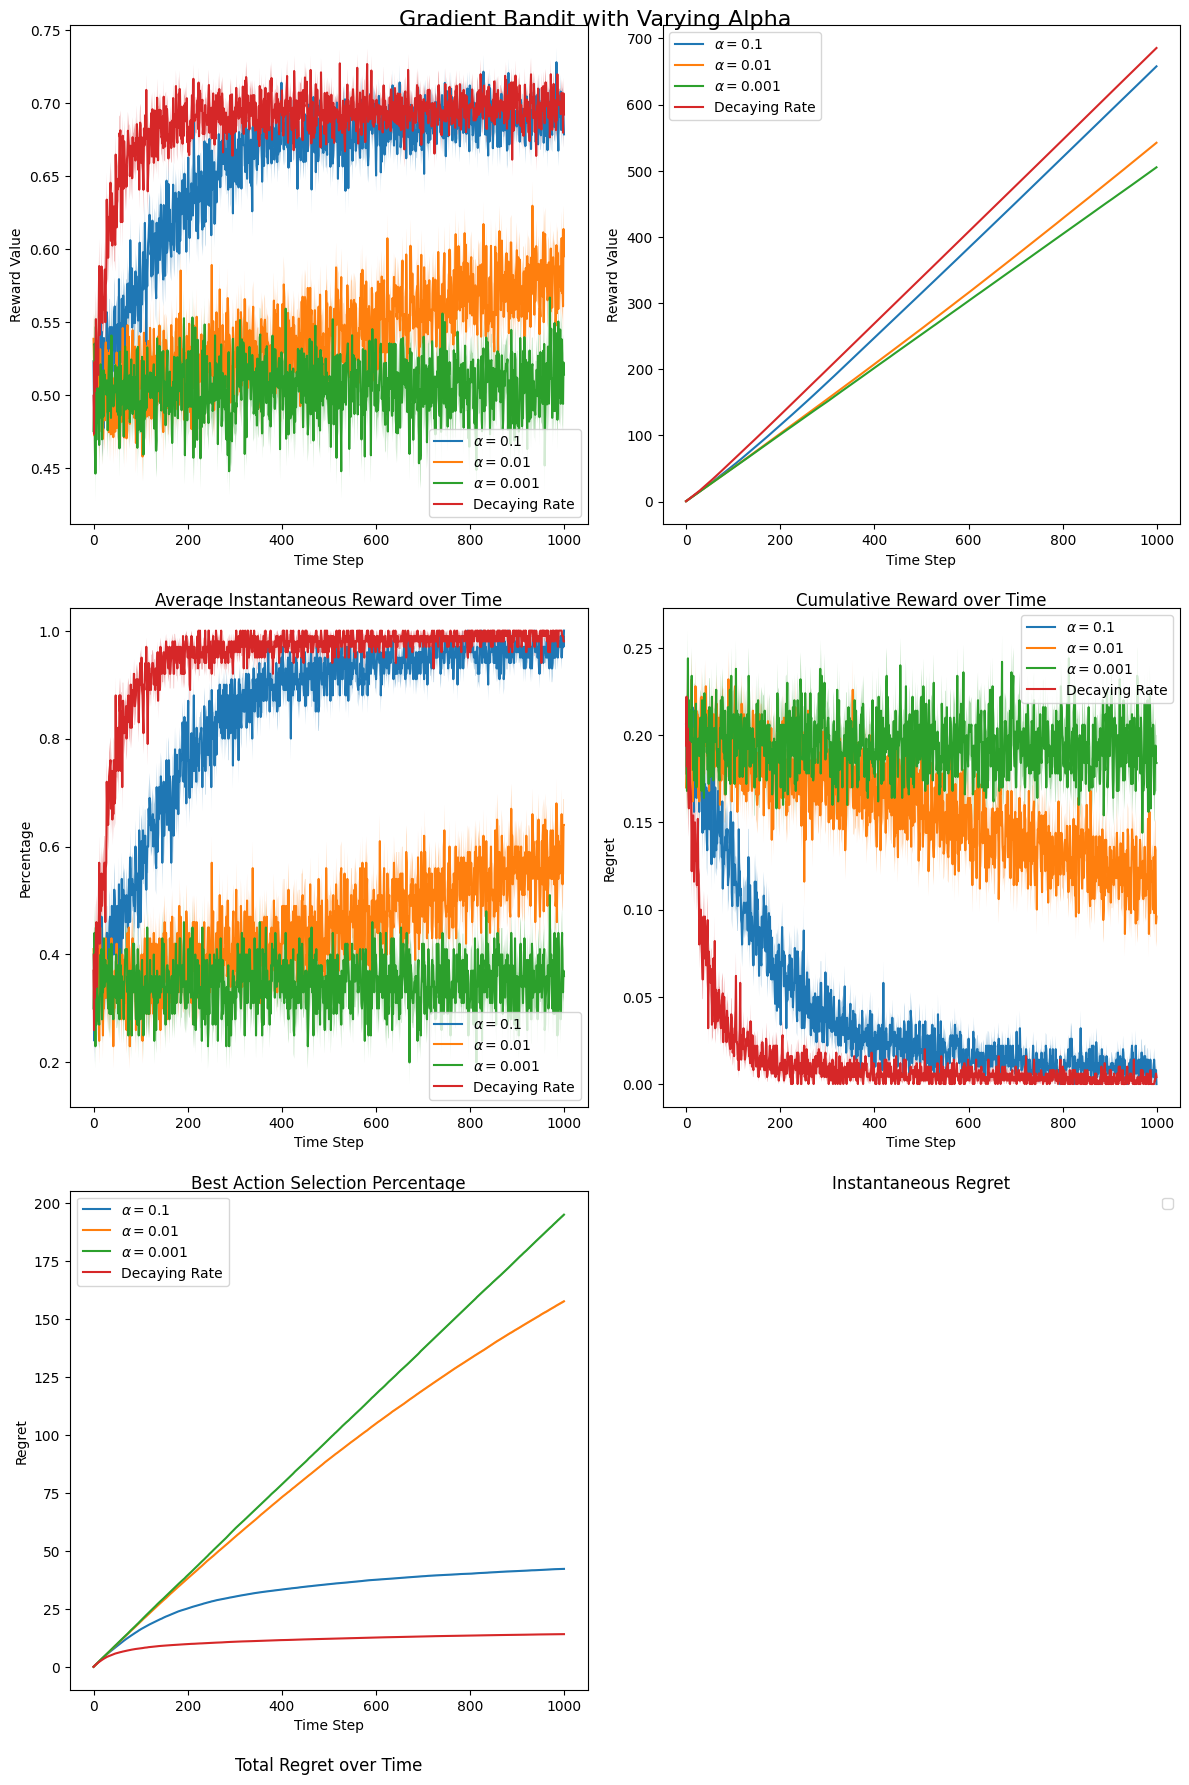

In [32]:
alphas = [0.1, 0.01, 0.001]
decaying_rate_params = {'lambda_': 0.01, 'p': 0.5}

fig, axs = plt.subplots(3, 2, figsize=(12, 18))

for alpha in alphas + ["decay"]:

    R_over_t_runs, total_R_over_t_runs = [], []
    est_is_best_over_t_runs, l_over_t_runs, total_l_over_t_runs = [], [], []

    for _ in range(100):
        if alpha == "decay":
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
                bandit=three_arm_gaussian_bandit, 
                alpha=0.5,  
                decaying_rate=True,
                lambda_=decaying_rate_params['lambda_'],
                p=decaying_rate_params['p']
            )
        else:
            R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
                bandit=three_arm_gaussian_bandit, 
                alpha=alpha, 
                decaying_rate=False
            )

        R_over_t_runs.append(R_over_t)
        total_R_over_t_runs.append(total_R_over_t)
        est_is_best_over_t_runs.append(est_is_best_over_t)
        l_over_t_runs.append(l_over_t)
        total_l_over_t_runs.append(total_l_over_t)

    mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
    std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(len(R_over_t_runs))
    
    mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
    std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(len(total_R_over_t_runs))
    
    est_is_best_avgs = np.mean(est_is_best_over_t_runs, axis=0)
    l_over_t_avgs = np.mean(l_over_t_runs, axis=0)
    total_l_over_t_avgs = np.mean(total_l_over_t_runs, axis=0)
    
    # Standard errors for the other metrics
    est_is_best_std_err = np.std(est_is_best_over_t_runs, axis=0) / np.sqrt(len(est_is_best_over_t_runs))
    l_over_t_std_err = np.std(l_over_t_runs, axis=0) / np.sqrt(len(l_over_t_runs))
    total_l_over_t_std_err = np.std(total_l_over_t_runs, axis=0) / np.sqrt(len(total_l_over_t_runs))

    # Label based on the alpha value
    alpha_label = "Decaying Rate" if alpha == "decay" else r"$\alpha = %s$" % alpha

    # Plot Instantaneous Reward Over Time
    axs[0, 0].plot(mean_R_over_t_runs, label=alpha_label)
    axs[0, 0].fill_between(range(0, 1000), mean_R_over_t_runs - std_err_R_over_t_runs,
                           mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)
    axs[0, 0].set_xlabel("Time Step")
    axs[0, 0].set_ylabel("Reward Value")
    axs[0, 0].set_title("Average Instantaneous Reward over Time", y=-0.18)

    # Plot Cumulative Reward Over Time
    axs[0, 1].plot(mean_total_R_over_t_runs, label=alpha_label)
    axs[0, 1].fill_between(range(0, 1000), mean_total_R_over_t_runs - std_err_total_R_over_t_runs,
                           mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.4)
    axs[0, 1].set_xlabel("Time Step")
    axs[0, 1].set_ylabel("Reward Value")
    axs[0, 1].set_title("Cumulative Reward over Time", y=-0.18)

    # Plot Best Action Selection Percentage
    axs[1, 0].plot(est_is_best_avgs, label=alpha_label)
    axs[1, 0].fill_between(range(0, 1000), est_is_best_avgs - est_is_best_std_err,
                           est_is_best_avgs + est_is_best_std_err, alpha=0.4)
    axs[1, 0].set_xlabel("Time Step")
    axs[1, 0].set_ylabel("Percentage")
    axs[1, 0].set_title("Best Action Selection Percentage", y=-0.18)

    # Plot Instantaneous Regret
    axs[1, 1].plot(l_over_t_avgs, label=alpha_label)
    axs[1, 1].fill_between(range(0, 1000), l_over_t_avgs - l_over_t_std_err,
                           l_over_t_avgs + l_over_t_std_err, alpha=0.4)
    axs[1, 1].set_xlabel("Time Step")
    axs[1, 1].set_ylabel("Regret")
    axs[1, 1].set_title("Instantaneous Regret", y=-0.18)

    # Plot Total Regret Over Time
    axs[2, 0].plot(total_l_over_t_avgs, label=alpha_label)
    axs[2, 0].fill_between(range(0, 1000), total_l_over_t_avgs - total_l_over_t_std_err,
                           total_l_over_t_avgs + total_l_over_t_std_err, alpha=0.4)
    axs[2, 0].set_xlabel("Time Step")
    axs[2, 0].set_ylabel("Regret")
    axs[2, 0].set_title("Total Regret over Time", y=-0.18)

axs[-1, -1].axis('off')

# Global title
fig.suptitle('Gradient Bandit with Varying Alpha', fontsize=16, y=0.98)

for ax in axs.flat:
    ax.legend()

plt.tight_layout()
plt.show()

### Answers
In the Gradient Bandit algorithm, a decaying learning rate (α) outperforms the three static α values. Among the static alphas, α = 0.1 demonstrates a significant performance advantage over α = 0.01 and α = 0.0001, suggesting that a higher learning rate enables faster adaptation and better results. Smaller values of α, on the other hand, slow down the learning process and result in lower performance. While a decaying learning rate may lead to lower performance in the long term, it begins with a higher α (e.g., α = 0.5), and over time, the model benefits from more accurate generalization even though the learning rate decays.

## Q7 Thompson Sampling

In [33]:
def Thompson_sampling(bandit, bandit_2 = None, num_time_step = 1000):
  """Thompson sampling algorithm for bandit action selection

  Parameters
  ----------
  bandit : bandit class
      A bernoulli bandit attributes num_arms and probs_arr, and method sample

  Returns
  -------
  R_over_t
      a list of instantaneous return over the time steps
  total_R_over_t
      a list of cummulative reward over the time steps
  est_is_best_over_t
      a list of values of 0 and 1 where 1 indicates the estimated best action is the true best action and 0 otherwise for each time step
  l_over_t
      a list of instanteneous regret over the time steps
  total_l_over_t
      a list of cummulative regret over the time steps
  """

  """ YOUR CODE GOES HERE """
  curr_bandit = bandit
  num_arms = curr_bandit.num_arms
  true_probs = curr_bandit.mean
  best_arm = np.argmax(true_probs)
  best_prob = true_probs[best_arm]

  alpha = np.ones(num_arms)
  beta = np.ones(num_arms)

  R_over_t = []
  total_R_over_t = []
  est_is_best_over_t = []
  l_over_t = []
  total_l_over_t = []

  total_reward = 0
  total_regret = 0

  for t in range(num_time_step):
      if bandit_2 is not None and t == 499:
          curr_bandit = bandit_2
          true_probs = curr_bandit.mean
          best_arm = np.argmax(true_probs)
          best_prob = true_probs[best_arm]

      # Sample from the Beta distribution for each arm
      sampled_probs = np.random.beta(alpha, beta)

      chosen_arm = np.argmax(sampled_probs)

      reward = curr_bandit.sample(chosen_arm)

      alpha[chosen_arm] += reward
      beta[chosen_arm] += 1 - reward

      regret = best_prob - true_probs[chosen_arm]
      total_regret += regret

      total_reward += reward

      R_over_t.append(reward)
      total_R_over_t.append(total_reward)
      l_over_t.append(regret)
      total_l_over_t.append(total_regret)
      est_is_best_over_t.append(1 if chosen_arm == best_arm else 0)

  return R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t

### Graphs

C:\Users\CalayahXiong\AppData\Local\Temp\ipykernel_14636\4285669076.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0,0].legend()
C:\Users\CalayahXiong\AppData\Local\Temp\ipykernel_14636\4285669076.py:53: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[0,1].legend()
C:\Users\CalayahXiong\AppData\Local\Temp\ipykernel_14636\4285669076.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1,0].legend()
C:\Users\CalayahXiong\AppData\Local\Temp\ipykernel_14636\4285669076.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored wh

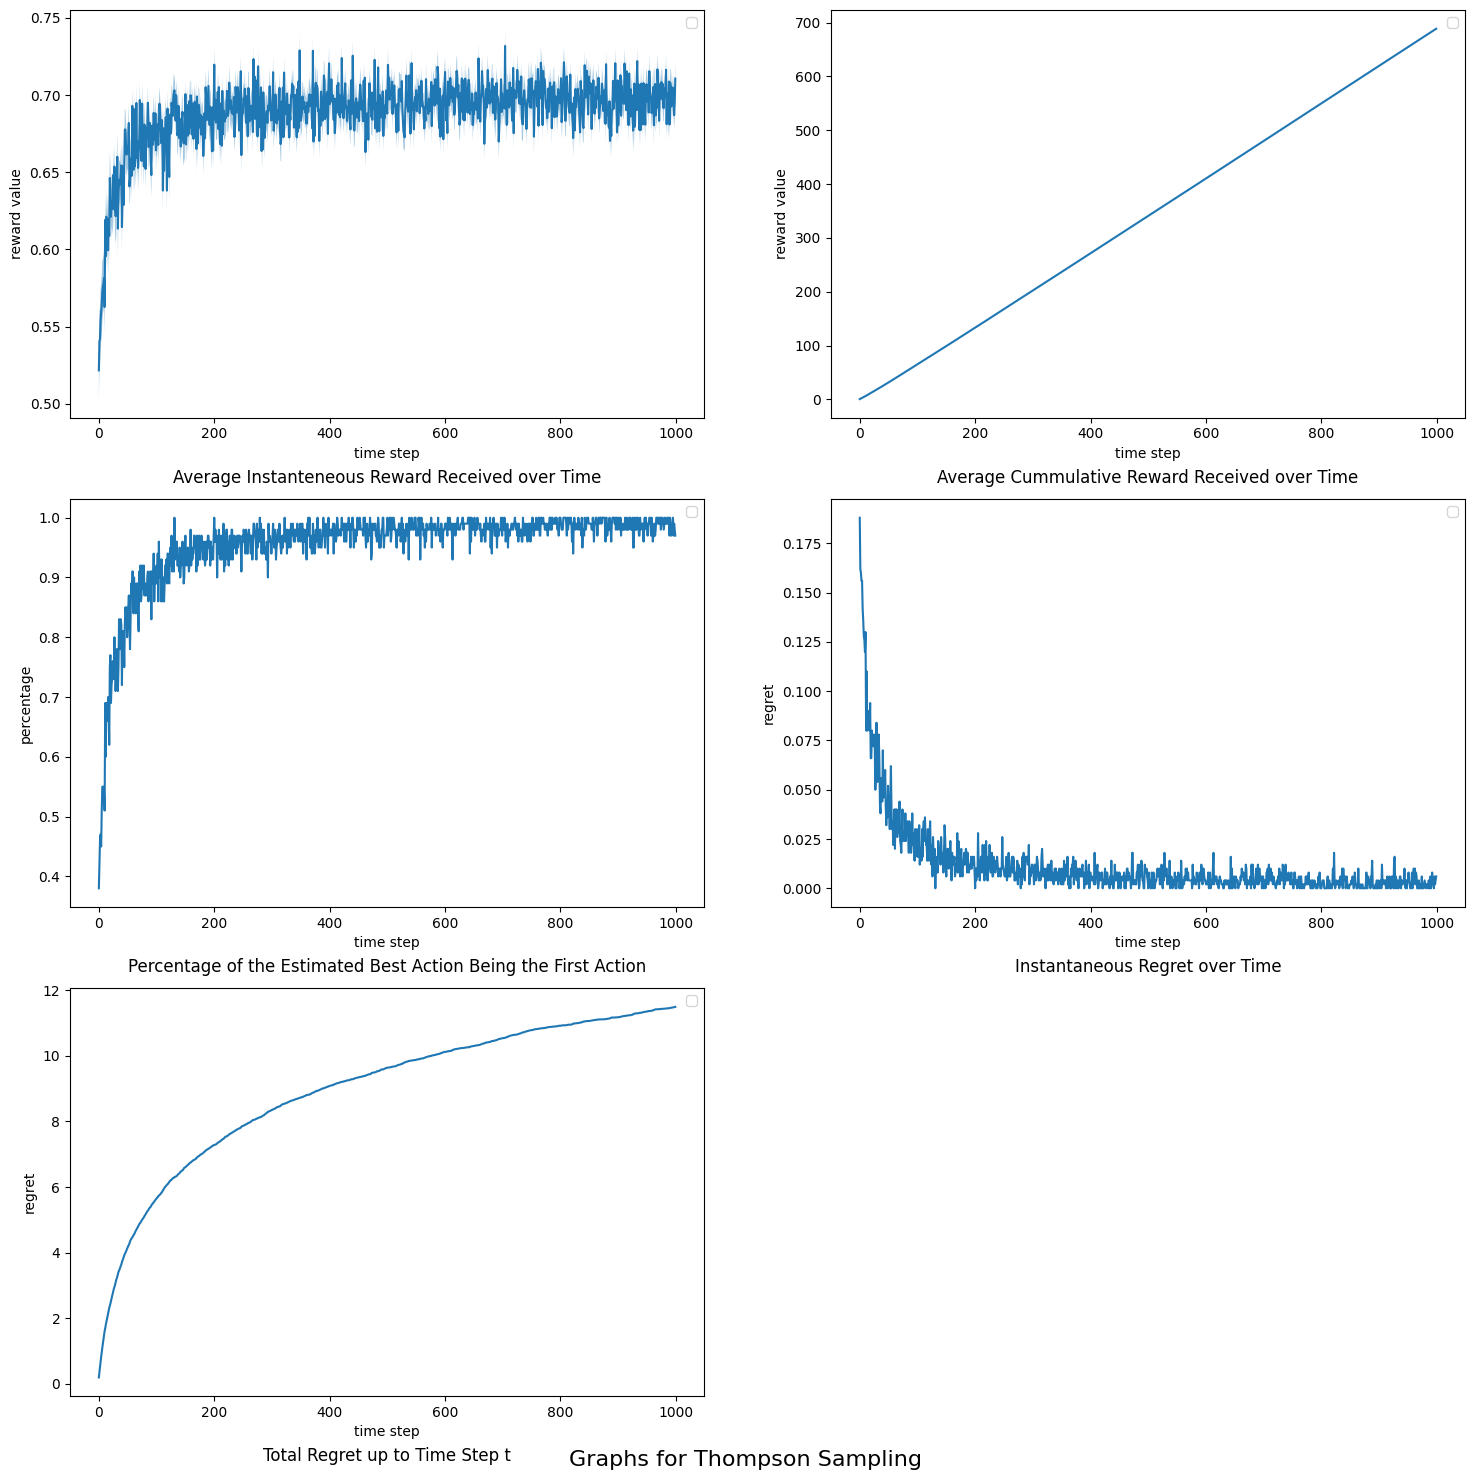

In [34]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

# arrays of the data generated from 100 runs
R_over_t_runs = []
total_R_over_t_runs = []
est_is_best_over_t_runs = []
l_over_t_runs = []
total_l_over_t_runs = []

for run in range(100):
  R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(three_arm_gaussian_bandit)

  R_over_t_runs.append(R_over_t)
  total_R_over_t_runs.append(total_R_over_t)
  est_is_best_over_t_runs.append(est_is_best_over_t)
  l_over_t_runs.append(l_over_t)
  total_l_over_t_runs.append(total_l_over_t)

R_over_t_runs = np.asarray(R_over_t_runs)
total_R_over_t_runs = np.asarray(total_R_over_t_runs)
est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
l_over_t_runs = np.asarray(l_over_t_runs)
total_l_over_t_runs = np.asarray(total_l_over_t_runs)

# plot the mean reward over time

mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

axs[0,0].plot(mean_R_over_t_runs)

R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
# axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

axs[0,0].legend()
axs[0,0].set_xlabel("time step")
axs[0,0].set_ylabel("reward value")
axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

# plot the mean cummulative reward over time

mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

axs[0,1].plot(mean_total_R_over_t_runs)

total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

axs[0,1].legend()
axs[0,1].set_xlabel("time step")
axs[0,1].set_ylabel("reward value")
axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

#plot the mean percentage of the estimated best action being the first action

est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs)

axs[1,0].legend()
axs[1,0].set_xlabel("time step")
axs[1,0].set_ylabel("percentage")
axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18) # just use the prob of the best action appearing in actions computation

#plot the mean instantaneous regret over time

l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
axs[1,1].plot(l_over_t_runs_avgs)

axs[1,1].legend()
axs[1,1].set_xlabel("time step")
axs[1,1].set_ylabel("regret")
axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

#plot the total regret over time

total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
axs[2,0].plot(total_l_over_t_runs_avgs)

axs[2,0].legend()
axs[2,0].set_xlabel("time step")
axs[2,0].set_ylabel("regret")
axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = r'Graphs for Thompson Sampling'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers
Thompson Sampling demonstrates that both instantaneous rewards and regret stabilize and converge after approximately time step 200.

## Q8 Comparison of Algorithms

### Graphs

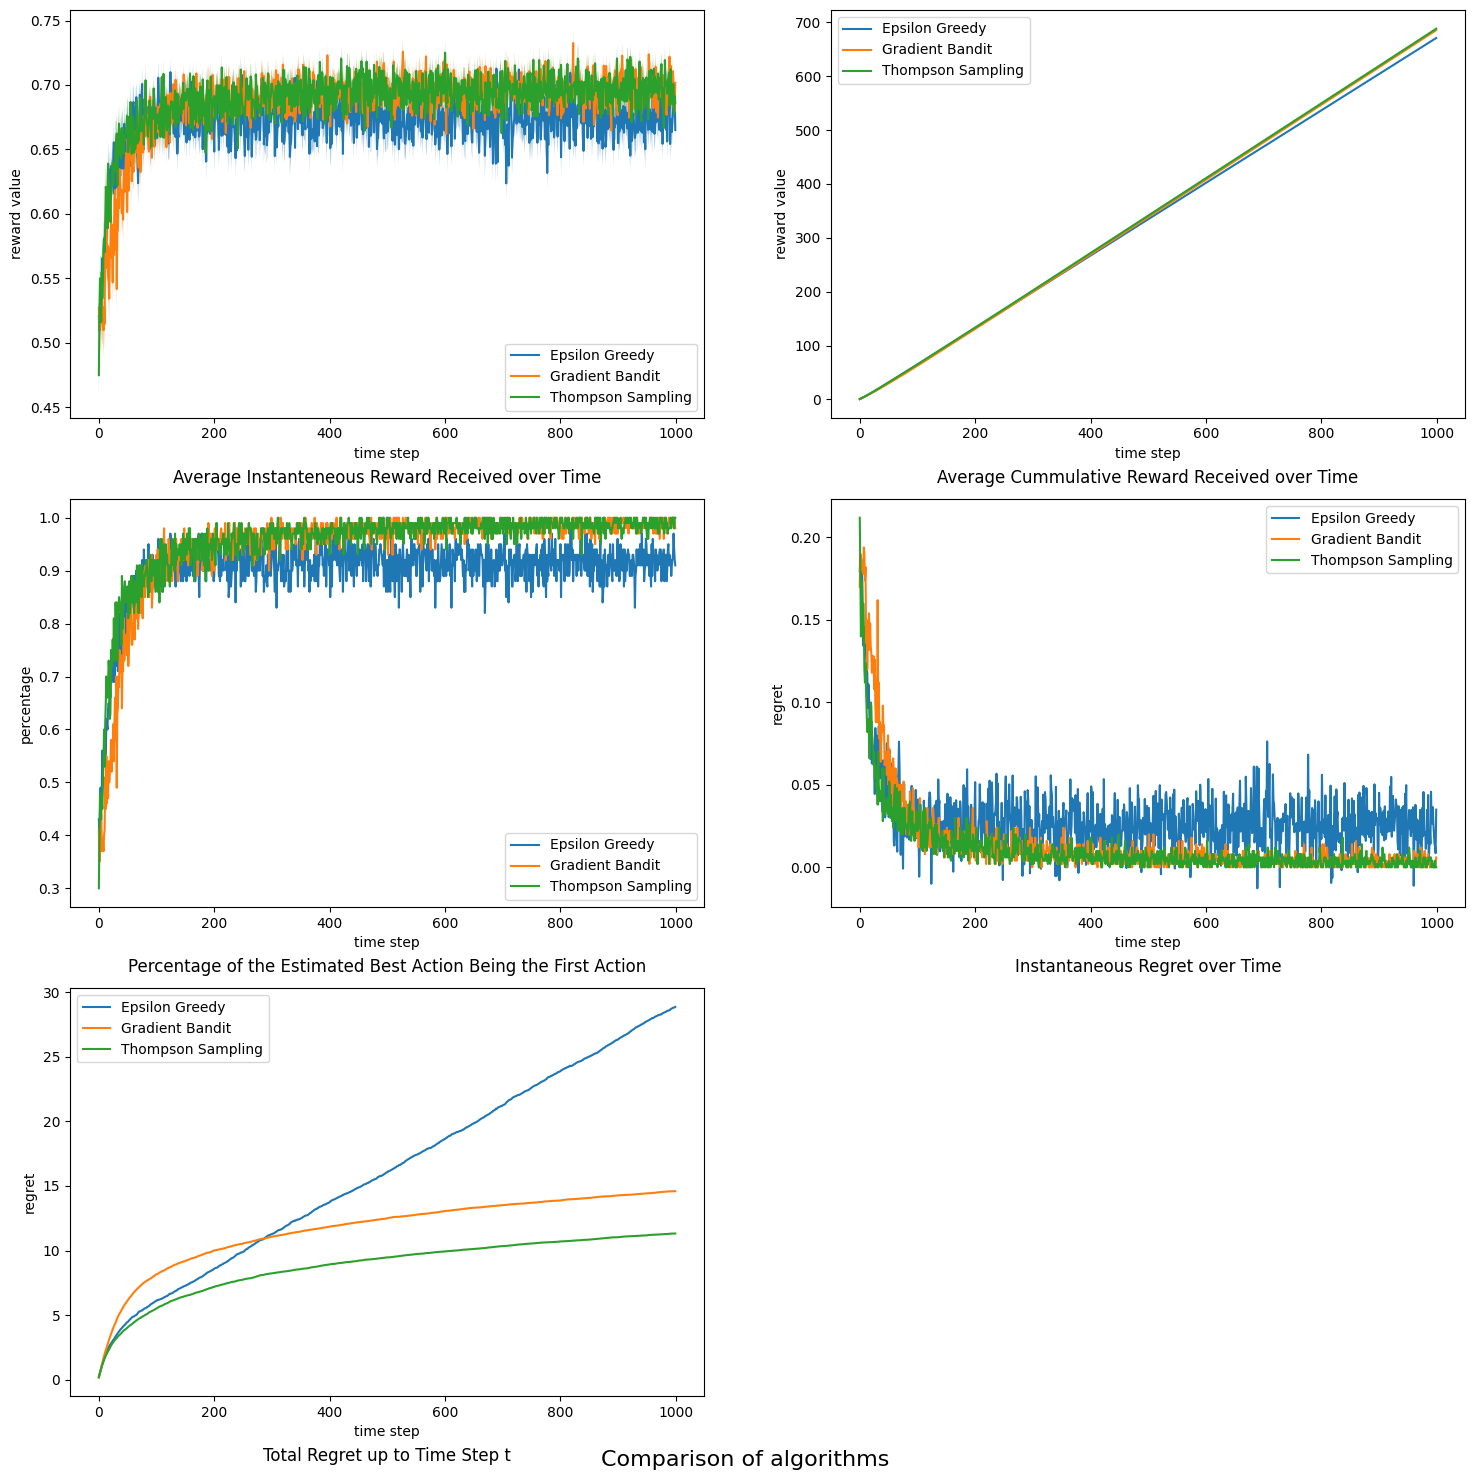

In [35]:
algorithms = ["Epsilon Greedy", "Gradient Bandit", "Thompson Sampling"]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18,18))

for a in algorithms:
  # arrays of the data generated from 100 runs
  R_over_t_runs = []
  total_R_over_t_runs = []
  est_is_best_over_t_runs = []
  l_over_t_runs = []
  total_l_over_t_runs = []

  for run in range(100):
    if a == "Epsilon Greedy":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
          bandit=three_arm_gaussian_bandit,
          epsilon=1/8,
          alpha=None # incremental average
      )
    elif a == "Gradient Bandit":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = gradient_bandit(
          bandit=three_arm_gaussian_bandit,
          alpha=0.5,
          decaying_rate=True,
          lambda_=0.01,
          p=0.5
      )
    elif a == "Thompson Sampling":
      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = Thompson_sampling(
          three_arm_gaussian_bandit
      )

    R_over_t_runs.append(R_over_t)
    total_R_over_t_runs.append(total_R_over_t)
    est_is_best_over_t_runs.append(est_is_best_over_t)
    l_over_t_runs.append(l_over_t)
    total_l_over_t_runs.append(total_l_over_t)

  R_over_t_runs = np.asarray(R_over_t_runs)
  total_R_over_t_runs = np.asarray(total_R_over_t_runs)
  est_is_best_over_t_runs = np.asarray(est_is_best_over_t_runs)
  l_over_t_runs = np.asarray(l_over_t_runs)
  total_l_over_t_runs = np.asarray(total_l_over_t_runs)

  # plot the mean reward over time

  mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
  std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))

  axs[0,0].plot(mean_R_over_t_runs, label = a)

  R_over_t_minus_std_err = mean_R_over_t_runs - std_err_R_over_t_runs
  R_over_t_plus_std_err = mean_R_over_t_runs  + std_err_R_over_t_runs
  axs[0,0].fill_between(range(0,1000), R_over_t_minus_std_err, R_over_t_plus_std_err, alpha=0.4)
  # axs[0,0].errorbar(range(0,1000), mean_R_over_t_runs, yerr=std_err_R_over_t_runs)

  axs[0,0].legend()
  axs[0,0].set_xlabel("time step")
  axs[0,0].set_ylabel("reward value")
  axs[0,0].set_title("Average Instanteneous Reward Received over Time", y=-0.18)

  # plot the mean cummulative reward over time

  mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
  std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

  axs[0,1].plot(mean_total_R_over_t_runs, label = a)

  total_R_over_t_minus_std_err = mean_total_R_over_t_runs - std_err_total_R_over_t_runs
  total_R_over_t_plus_std_err = mean_total_R_over_t_runs  + std_err_total_R_over_t_runs
  axs[0,1].fill_between(range(0,1000), total_R_over_t_minus_std_err, total_R_over_t_plus_std_err, alpha=0.4)

  axs[0,1].legend()
  axs[0,1].set_xlabel("time step")
  axs[0,1].set_ylabel("reward value")
  axs[0,1].set_title("Average Cummulative Reward Received over Time", y=-0.18)

  #plot the mean percentage of the estimated best action being the first action

  est_is_best_over_t_runs_avgs = np.mean(est_is_best_over_t_runs, axis=0)
  plt_est_is_best_over_t_runs_avgs, = axs[1,0].plot(est_is_best_over_t_runs_avgs, label = a)

  axs[1,0].legend()
  axs[1,0].set_xlabel("time step")
  axs[1,0].set_ylabel("percentage")
  axs[1,0].set_title("Percentage of the Estimated Best Action Being the First Action", y=-0.18) # just use the prob of the best action appearing in actions computation

  #plot the mean instantaneous regret over time

  l_over_t_runs_avgs = np.mean(l_over_t_runs, axis=0)
  axs[1,1].plot(l_over_t_runs_avgs, label = a)

  axs[1,1].legend()
  axs[1,1].set_xlabel("time step")
  axs[1,1].set_ylabel("regret")
  axs[1,1].set_title("Instantaneous Regret over Time", y=-0.18)

  #plot the total regret over time

  total_l_over_t_runs_avgs = np.mean(total_l_over_t_runs, axis=0)
  axs[2,0].plot(total_l_over_t_runs_avgs, label = a)

  axs[2,0].legend()
  axs[2,0].set_xlabel("time step")
  axs[2,0].set_ylabel("regret")
  axs[2,0].set_title("Total Regret up to Time Step t", y=-0.18)

axs[-1, -1].axis('off')

title = 'Comparison of algorithms'
fig.suptitle(title, fontsize=16, y=0.08)

plt.show()

### Answers
Based on the average instanteneous reward received, percentage of the estimated best action being the 1st action, and the instanteneous regret over time, I select "best" hyperparams when one get higher value in the long run over these metrics and how many time steps they need to converge.
The Epsilon-Greedy algorithm demonstrates superior performance during the early stages of the time steps, while the Gradient Bandit algorithm starts to outperform Epsilon-Greedy after approximately 100 time steps.
Thompson Sampling significantly outperform both Epsilon-Greedy and Gradient Bandit algorithms in terms of overall performance.

## Q9 Non-stationary Environment

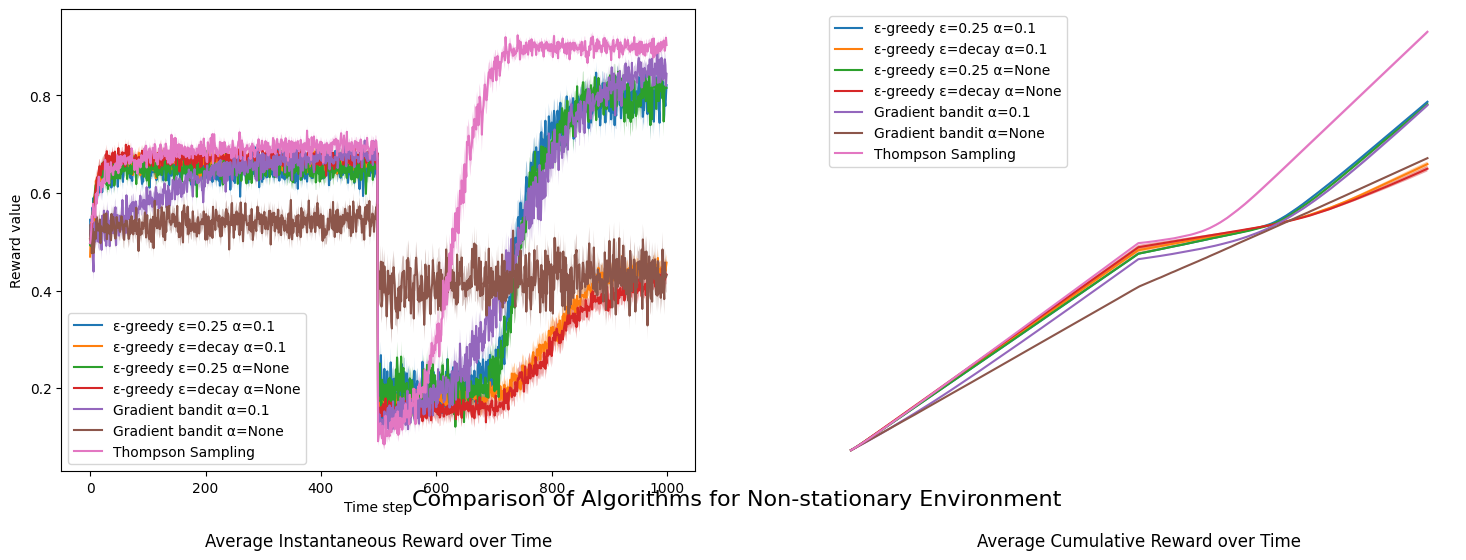

In [36]:
alphas = [0.1, None]
epsilons = [1/4]
decaying_epsilon_params = {'epsilon_0': 1/2, 'lambda_': 0.1}  # Decaying epsilon parameters
algorithms = ["ε-greedy", "Gradient bandit", "Thompson Sampling"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,6))

for a in algorithms:
    if a == "ε-greedy":
        for alpha in alphas:
            for epsilon in epsilons + ["decay"]:
                R_over_t_runs = []
                total_R_over_t_runs = []

                for run in range(100):
                    if epsilon == "decay":
                      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                          bandit=three_arm_gaussian_bandit,
                          epsilon=decaying_epsilon_params['epsilon_0'],
                          bandit_2=three_arm_gaussian_bandit_2,
                          epsilon_decay=True,
                          lambda_=decaying_epsilon_params['lambda_']
                      )
                    else:
                      R_over_t, total_R_over_t, est_is_best_over_t, l_over_t, total_l_over_t = epsilon_greedy(
                          bandit=three_arm_gaussian_bandit,
                          epsilon=epsilon,
                          bandit_2=three_arm_gaussian_bandit_2
                      )
                    R_over_t_runs.append(R_over_t)
                    total_R_over_t_runs.append(total_R_over_t)

                label = f"{a} ε={epsilon} α={alpha}"
                mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
                std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))
                mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
                std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

                axs[0].plot(mean_R_over_t_runs, label=label)
                axs[0].fill_between(range(1000), mean_R_over_t_runs - std_err_R_over_t_runs, mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

                axs[1].plot(mean_total_R_over_t_runs, label=label)
                axs[1].fill_between(range(1000), mean_total_R_over_t_runs - std_err_total_R_over_t_runs, mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.4)

    elif a == "Gradient bandit":
        for alpha in alphas:
            R_over_t_runs = []
            total_R_over_t_runs = []

            for run in range(100):
                R_over_t, total_R_over_t, _, _, _ = gradient_bandit(
                    bandit=three_arm_gaussian_bandit,
                    bandit_2=three_arm_gaussian_bandit_2,
                    alpha=alpha
                )
                R_over_t_runs.append(R_over_t)
                total_R_over_t_runs.append(total_R_over_t)

            label = f"{a} α={alpha}"
            mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
            std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))
            mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
            std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

            axs[0].plot(mean_R_over_t_runs, label=label)
            axs[0].fill_between(range(1000), mean_R_over_t_runs - std_err_R_over_t_runs, mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

            axs[1].plot(mean_total_R_over_t_runs, label=label)
            axs[1].fill_between(range(1000), mean_total_R_over_t_runs - std_err_total_R_over_t_runs, mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.4)

    elif a == "Thompson Sampling":
        R_over_t_runs = []
        total_R_over_t_runs = []

        for run in range(100):
            R_over_t, total_R_over_t, _, _, _ = Thompson_sampling(bandit=three_arm_gaussian_bandit,                                         bandit_2=three_arm_gaussian_bandit_2)
            R_over_t_runs.append(R_over_t)
            total_R_over_t_runs.append(total_R_over_t)

        label = a
        mean_R_over_t_runs = np.mean(R_over_t_runs, axis=0)
        std_err_R_over_t_runs = np.std(R_over_t_runs, axis=0) / np.sqrt(np.size(R_over_t_runs, axis=0))
        mean_total_R_over_t_runs = np.mean(total_R_over_t_runs, axis=0)
        std_err_total_R_over_t_runs = np.std(total_R_over_t_runs, axis=0) / np.sqrt(np.size(total_R_over_t_runs, axis=0))

        axs[0].plot(mean_R_over_t_runs, label=label)
        axs[0].fill_between(range(1000), mean_R_over_t_runs - std_err_R_over_t_runs, mean_R_over_t_runs + std_err_R_over_t_runs, alpha=0.4)

        axs[1].plot(mean_total_R_over_t_runs, label=label)
        axs[1].fill_between(range(1000), mean_total_R_over_t_runs - std_err_total_R_over_t_runs, mean_total_R_over_t_runs + std_err_total_R_over_t_runs, alpha=0.4)

axs[0].legend()
axs[0].set_xlabel("Time step")
axs[0].set_ylabel("Reward value")
axs[0].set_title("Average Instantaneous Reward over Time", y=-0.18)

axs[1].legend()
axs[1].set_xlabel("Time step")
axs[1].set_ylabel("Cumulative Reward")
axs[1].set_title("Average Cumulative Reward over Time", y=-0.18)

axs[-1].axis('off')
fig.suptitle('Comparison of Algorithms for Non-stationary Environment', fontsize=16, y=0.08)
plt.show()

### Answers
During the first 500 time steps, all four Epsilon-Greedy algorithms and Thompson Sampling outperform Gradient Bandit. Notably, Gradient Bandit with α=0.1 surpasses the Epsilon-Greedy algorithms(ε=0.25, α=None) after approximately 300 time steps.

In the latter 500 time steps, Thompson Sampling, Epsilon-Greedy and Gradient Bandit with α=0.1 experience a significant drop, performing much worse than Gradient Bandit with incremental averaging. However, all these algorithms gradually improve, with Epsilon-Greedy (ε=0.25, α=0.1), Epsilon-Greedy with decaying ε, and those using incremental averaging (α=0.1, 0.25) quickly surpassing both Gradient Bandit with incremental averaging. Epsilon-Greedy with decaying ε (α=0.1) and incremental averaging show limited improvement, failing to outperform Gradient Bandit with incremental averaging.
 And Thompson Sampling shows a notably springback speed and high performance in reward received.

Overall, Thompson Sampling proves effective in handling non-stationarity (with quick recovery and high growth), consistently achieving strong results as time progresses.